<a href="https://colab.research.google.com/github/antndlcrx/Oxford-Methods-Spring-School/blob/main/preliminaries/quick_dl_torch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/dpir_oss.png?raw=true:,  width=70" alt="My Image" width=500>

# **Deep Learning and PyTorch**

## **1**.&nbsp; **Deep Learning**

**Deep learning** is a subfield of machine learning that uses **neural networks with many layers to automatically learn patterns from large amounts of data**. These models are inspired by the structure of the human brain and can learn to recognize complex patterns in text, images, audio, and more.

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/dl_from_pytorch_book.png?raw=true:,  width=70" alt="My Image" width=700>

[Image Source](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)

### **Backprop**

The **learning process is driven by** an algorithm called **backpropagation**, which adjusts the model's internal parameters (weights) based on how far off its predictions are from the actual outcomes. **This is done by computing gradients** — how much each parameter contributed to the error — and updating the parameters to improve performance.

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/backprop_torch_book.png?raw=true:,  width=70" alt="My Image" width=700>

[Image Source](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)

Frameworks like [**PyTorch**](https://pytorch.org/tutorials/beginner/basics/intro.html) make this process efficient and intuitive by automatically handling gradient computation and parameter updates through tools like autograd and optimizers.

> 📖 For a deep (no pun intended) dive, check-out these resources:
- [**Deep Learning with PyTorch Book by Stevens, Antiga, Viehmann**](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
- [Deep Learning by Goodfellow, Bengio, Aaron Courville](https://www.deeplearningbook.org/).

## **2**.&nbsp; **PyTorch**

🔧 **Introduction to PyTorch, Tensors, and Autograd**

**PyTorch** is a popular deep learning framework that combines flexibility and performance, widely used for machine learning and scientific computing. At its core is the concept of the **tensor** — a generalization of arrays or matrices. Tensors are **multidimensional arrays** that can run on either the CPU or GPU, making them ideal for high-performance computations.

A **PyTorch tensor** is like a NumPy array, but with built-in support for automatic differentiation and GPU acceleration. You can perform arithmetic, reshape operations, and apply complex functions, all while tracking the computational graph for gradients.

This tracking is handled by **autograd**, PyTorch's automatic differentiation engine. When you perform operations on tensors with `requires_grad=True`, PyTorch builds a computation graph behind the scenes. Then, by calling `.backward()`, it automatically computes the **gradients** of all involved tensors — which is essential for optimizing model parameters during training.

This combination of **tensors + autograd** enables PyTorch to support deep learning workflows with concise, readable code.

### 📦 **PyTorch Tensors: Attributes and Methods**

In PyTorch, a [**tensor**](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html) is the primary data structure — like a NumPy array, but with support for automatic differentiation and GPU acceleration. Understanding a few key **tensor attributes** and **methods** will help you debug, reshape, and manipulate data effectively.

### 🔍 Common Tensor Attributes

| Attribute         | Description                            | Example Output             |
|------------------|----------------------------------------|----------------------------|
| `tensor.shape`   | The size of each dimension              | `torch.Size([3, 2])`       |
| `tensor.dtype`   | The data type (e.g., `float32`, `int64`) | `torch.float32`            |
| `tensor.device`  | The device the tensor is on (CPU/GPU)   | `cpu` or `cuda:0`          |
| `tensor.requires_grad` | Tracks if autograd will compute gradients | `True` or `False`      |

### 🛠️ Common Tensor Methods

| Method              | Purpose                                 |
|---------------------|-----------------------------------------|
| `tensor.view()`     | Reshapes the tensor (like `.reshape()`) |
| `tensor.unsqueeze()`| Adds a dimension (e.g., for batching)   |
| `tensor.squeeze()`  | Removes dimensions of size 1            |
| `tensor.item()`     | Extracts a Python number from a 1-element tensor |
| `tensor.detach()`   | Returns a new tensor detached from the computation graph |
| `tensor.clone()`    | Creates a copy of the tensor            |

---

### 🧠 **Main PyTorch Modules**

PyTorch is modular and offers a rich ecosystem for building and training deep learning models. Here are the most important submodules you'll use frequently:

### 🔧 `torch.nn`
This is the [**neural network module**](https://pytorch.org/docs/stable/nn.html), used to build models by combining layers like `nn.Linear`, `nn.Conv2d`, `nn.ReLU`, etc. You typically subclass `nn.Module` to define custom models.

```python
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)
```

### 🎯 `torch.nn.functional` (aka `F`)
This module provides **stateless versions** of layers and activation functions. You use `F.relu(x)` or `F.cross_entropy()` when you want more control over operations inside your custom model. See more [here](https://pytorch.org/docs/stable/nn.functional.html).

```python
import torch.nn.functional as F

x = torch.randn(3, 5)
output = F.relu(x)
```

### 📉 `torch.optim`
This [module](https://pytorch.org/docs/stable/optim.html) includes **optimizers** like SGD, Adam, etc., which are used to update model parameters during training.

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```

### 📦 `torch.utils.data`
[`torch.utils.data`](https://pytorch.org/docs/stable/data.html) provides tools for handling data, such as `Dataset` and `DataLoader`. These help manage large datasets and batch training.

```python
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)
```


### **Mini Example: Bivariate Linear Regression**

In [ ]:
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device
generator = torch.Generator(device=device)
generator.manual_seed(42)
x = torch.rand(100, generator=generator)
y = 2 * x + torch.randn(100, generator=generator)

In [ ]:
x

tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408,
        0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739,
        0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588,
        0.1994, 0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832, 0.3376, 0.8090,
        0.5779, 0.9040, 0.5547, 0.3423, 0.6343, 0.3644, 0.7104, 0.9464, 0.7890,
        0.2814, 0.7886, 0.5895, 0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103,
        0.6440, 0.7071, 0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542,
        0.3278, 0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666,
        0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155, 0.2418,
        0.1591, 0.7653, 0.2979, 0.8035, 0.3813, 0.7860, 0.1115, 0.2477, 0.6524,
        0.6057, 0.3725, 0.7980, 0.8399, 0.1374, 0.2331, 0.9578, 0.3313, 0.3227,
        0.0162])

In [ ]:
y

tensor([ 2.4053e+00,  2.4133e+00,  1.8327e+00,  1.4685e+00,  1.0214e-01,
         1.7761e+00,  7.0089e-01,  1.2297e+00,  2.1465e+00,  1.5395e+00,
         1.8679e+00,  8.8356e-01,  7.5237e-01,  1.2587e+00,  1.8321e+00,
         1.4761e+00,  2.4971e+00,  1.2390e+00,  1.4409e-01,  1.7828e+00,
         1.5704e+00,  1.7796e-01,  1.6070e+00,  1.3326e+00,  1.3056e+00,
         8.7888e-01,  1.4376e+00,  8.1014e-01,  5.2106e-01,  5.1918e-01,
         1.4279e+00, -3.4149e-01,  1.6360e+00,  2.8018e+00,  1.3300e+00,
         2.1940e+00,  7.9494e-01,  1.7474e+00,  1.1826e+00,  1.5033e+00,
         8.9334e-01,  1.7619e+00,  7.3421e-01,  2.5296e+00,  1.7956e+00,
         5.1617e-01,  1.4374e-01,  6.1240e-01,  1.7773e+00,  1.8012e-01,
        -7.2271e-01,  7.1794e-01,  1.2744e+00,  1.4208e+00, -1.0053e+00,
         1.9118e+00, -1.1639e+00,  5.6506e-01,  5.8715e-01,  1.1018e+00,
         7.5669e-01, -1.2699e-02,  3.2755e-01,  8.5035e-01,  1.5932e+00,
         6.0816e-02,  2.0042e+00, -6.8663e-01,  1.3

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

optimizer = torch.optim.SGD([w, b], lr=0.01)

epochs = 1000

for epoch in range(epochs):
    y_pred = x * w + b

    loss = torch.mean(y_pred**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss}")

epoch: 0, loss: 0.24149328470230103
epoch: 10, loss: 0.14361423254013062
epoch: 20, loss: 0.08546427637338638
epoch: 30, loss: 0.05091584846377373
epoch: 40, loss: 0.030388230457901955
epoch: 50, loss: 0.01818988285958767
epoch: 60, loss: 0.010939721018075943
epoch: 70, loss: 0.006629163399338722
epoch: 80, loss: 0.004064998589456081
epoch: 90, loss: 0.002538383239880204
epoch: 100, loss: 0.001628223224543035
epoch: 110, loss: 0.0010843591298907995
epoch: 120, loss: 0.000758180976845324
epoch: 130, loss: 0.000561402237508446
epoch: 140, loss: 0.0004415744624566287
epoch: 150, loss: 0.0003675367624964565
epoch: 160, loss: 0.00032077659852802753
epoch: 170, loss: 0.00029029426514171064
epoch: 180, loss: 0.0002695531293284148
epoch: 190, loss: 0.0002546683535911143
epoch: 200, loss: 0.00024333037436008453
epoch: 210, loss: 0.00023416535987053066
epoch: 220, loss: 0.00022635514324065298
epoch: 230, loss: 0.00021941232262179255
epoch: 240, loss: 0.00021304553956724703
epoch: 250, loss: 0.00

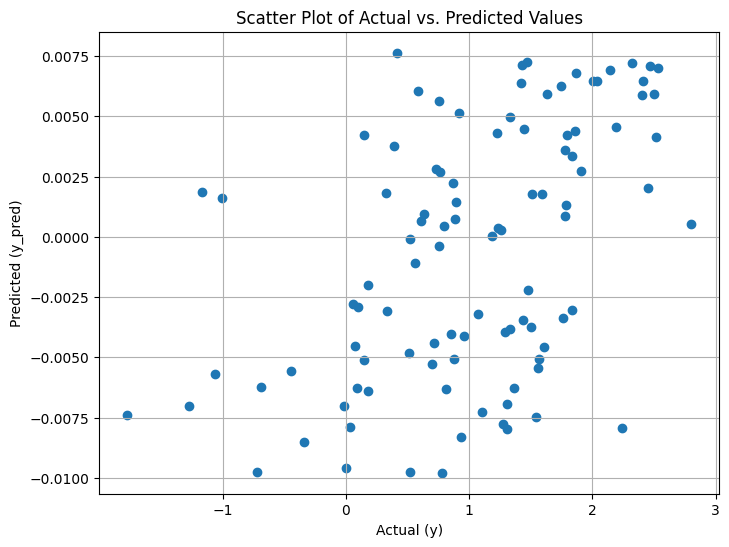

In [ ]:
import matplotlib.pyplot as plt

# Get the final predictions
y_pred = x * w + b

# Detach tensors from the computational graph for plotting
y_pred_np = y_pred.detach().numpy()
y_np = y.detach().numpy()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_np, y_pred_np)
plt.xlabel("Actual (y)")
plt.ylabel("Predicted (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()